### Importing Liberaries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('Solarize_Light2')

### loading dataset 

In [14]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [15]:
X.shape

(500, 2)

In [33]:
X[0]

array([-6.94238952, -6.8807223 ])

In [17]:
y

array([3, 2, 1, 3, 3, 1, 4, 3, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 0, 0,
       3, 1, 3, 0, 4, 4, 1, 4, 3, 4, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 4, 4,
       1, 2, 2, 1, 4, 4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 1, 2, 1, 1, 3, 4, 2,
       1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 3, 4, 0, 0, 1, 0, 1, 4, 2, 4, 1, 2,
       4, 1, 4, 0, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 4, 3, 2, 1, 0, 2, 4, 0, 1, 2, 1, 4, 3, 0, 4, 4, 4, 3, 3, 1, 1,
       3, 2, 2, 4, 1, 4, 1, 3, 3, 0, 1, 2, 4, 3, 2, 2, 3, 1, 3, 3, 1, 1,
       2, 0, 0, 4, 1, 3, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 4, 3, 0, 2, 0, 4,
       3, 1, 2, 4, 2, 3, 2, 0, 4, 4, 0, 3, 1, 2, 0, 1, 4, 3, 4, 0, 1, 4,
       3, 3, 3, 0, 0, 2, 3, 4, 4, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3, 3, 2, 4,
       1, 4, 4, 0, 3, 1, 3, 1, 4, 0, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 2,
       3, 3, 1, 1, 0, 2, 0, 3, 4, 2, 4, 3, 4, 4, 4, 4, 2, 0, 2, 3, 0, 2,
       4, 1, 2, 2, 2, 4, 3, 3, 1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 2, 2, 4, 3,
       0, 4, 4, 2, 0, 3, 1, 0, 1, 4, 1, 1, 2, 3, 0,

Text(0, 0.5, 'Feature 2')

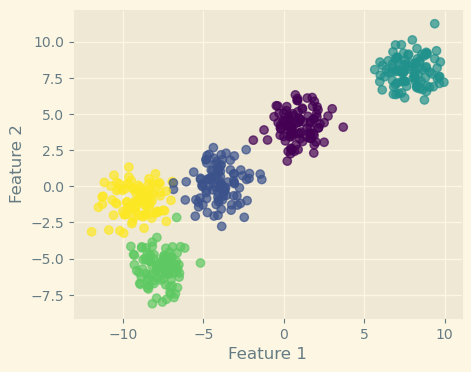

In [28]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],alpha=0.7,c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [50]:
# defining value of K and colors
k=5
colors=['green','yellow','blue','cyan','red']

### Step 1 : Randomly initialised centers 

In [51]:
np.random.random(size=X[0].shape)

array([0.19428714, 0.56175235])

In [52]:
-10 + (np.random.random(size=X[0].shape) *(20))

array([-9.85378305,  3.20269853])

In [192]:
clusters = {}
for idx in range(k):
    center  = -10 + (np.random.random(size=X[0].shape) *(20))
    points  = [] 
    cluster = {
        'center' : center,
        'points' : points,
        'color'  : colors[idx]
    }    
    clusters[idx] = cluster
    
clusters
    

{0: {'center': array([8.3534464 , 2.53499403]),
  'points': [],
  'color': 'green'},
 1: {'center': array([2.46059362, 5.83828211]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-5.60173326, -0.2801767 ]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-3.41360853,  5.84678845]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-8.88306858,  1.00551853]),
  'points': [],
  'color': 'red'}}

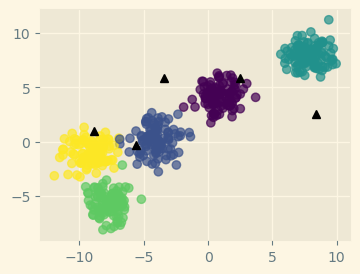

In [193]:
# visualizing the center points in the data
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],alpha=0.7,c=y)
for idx in range(k):
    plt.plot(clusters[idx]['center'][0],clusters[idx]['center'][1],marker='^',color='k')
plt.show()

### Step 2 : Assigning each data point to its nearest center

In [194]:
def eclu_distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [195]:
v1=np.array([2.3,4.5])
v2=np.array([3.1,5.9])
print(eclu_distance(v1,v2))

1.6124515496597103


In [209]:
# Implementing the E step
from tqdm import tqdm
def assign_cluster():
    for idx in tqdm(range(X.shape[0])):        
        dist  = []
        cur_x = X[idx]
        for i in range(k):
            distance = eclu_distance(cur_x,clusters[i]['center'])
            dist.append(distance) 
            
        cur_cluster=np.argmin(dist)
        clusters[cur_cluster]['points'].append(cur_x)
        
        
        
assign_cluster()



           

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4719.82it/s]


In [197]:
clusters

{0: {'center': array([8.3534464 , 2.53499403]),
  'points': [array([8.14492336, 7.52724561]),
   array([8.73872704, 5.97009465]),
   array([8.84851188, 9.26501008]),
   array([8.27287322, 6.92062212]),
   array([6.96905011, 6.3449164 ]),
   array([7.31936447, 6.46038969]),
   array([8.62460249, 6.68412192]),
   array([9.37763125, 8.82221751]),
   array([8.79679601, 7.51599724]),
   array([7.51057077, 6.11484261]),
   array([8.81683548, 9.15218311]),
   array([9.62662186, 7.57682932]),
   array([8.12306558, 7.9346747 ]),
   array([8.68547494, 8.9951675 ]),
   array([8.04420692, 7.50306905]),
   array([7.50149836, 7.27394157]),
   array([8.11549925, 7.64335676]),
   array([7.81447892, 8.09824746]),
   array([8.86147492, 9.10408388]),
   array([7.63489548, 6.92125317]),
   array([8.18488836, 8.52265495]),
   array([7.45059384, 7.28872692]),
   array([9.69030117, 7.58835273]),
   array([7.91872957, 8.25809924]),
   array([8.8664807 , 6.56420556]),
   array([9.20301038, 7.76735085]),
   arr

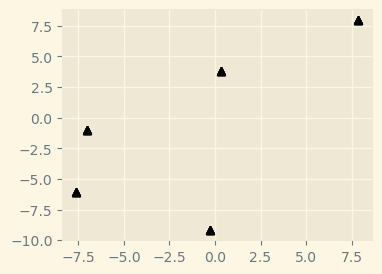

In [203]:
# visualizing the asssigned points in the data
def plot_cluster():
    plt.figure(figsize=(4,3))
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        
        try:
            
            plt.scatter(pts[:,0],pts[:,1],alpha=0.7,c=clusters[i]['color'])
               
        except:    
            pass
        
        for idx in range(k):
             plt.plot(clusters[idx]['center'][0],clusters[idx]['center'][1],marker='^',color='k') 
    plt.show() 
        
        
plot_cluster()

### Step 3 : Updating the center location by taking means

In [220]:
# Implementing M Step
def update_cluster():
    for idx in range(k):
        pts=np.array(clusters[idx]['points'])
        if (pts.shape[0]>0):
            new_center=pts.mean(axis=0)
            clusters[idx]['center']=new_center
            clusters[idx]['points']=[]
update_cluster()            

### Step 4: Repeating the step 2 and 3 untill convergence : 

In [242]:
# main
# defining value of K and colors
k=5
colors=['green','yellow','blue','cyan','red']

clusters = {}
for idx in range(k):
    center  = -10 + (np.random.random(size=X[0].shape) *(20))
    points  = [] 
    cluster = {
        'center' : center,
        'points' : points,
        'color'  : colors[idx]
    }    
    clusters[idx] = cluster
clusters

{0: {'center': array([-6.2025651 ,  6.43536344]),
  'points': [],
  'color': 'green'},
 1: {'center': array([8.00230219, 6.508812  ]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-9.07121119, -8.11250263]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.80317224,  5.63636806]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-5.2316218 ,  3.73750427]),
  'points': [],
  'color': 'red'}}

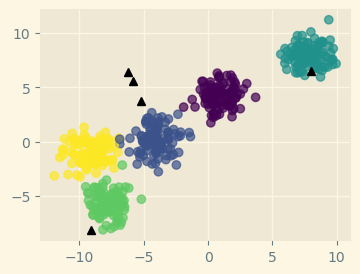

In [243]:
# after random initialisation
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],alpha=0.7,c=y)
for idx in range(k):
    plt.plot(clusters[idx]['center'][0],clusters[idx]['center'][1],marker='^',color='k')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5002.97it/s]


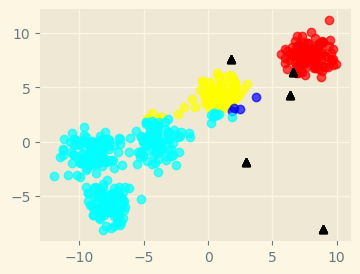

In [227]:
# iteration 1
assign_cluster()
plot_cluster()
update_cluster()


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5002.90it/s]


iteration  =  0


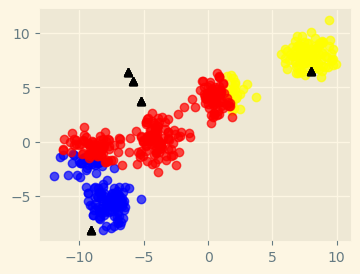

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5817.36it/s]


iteration  =  1


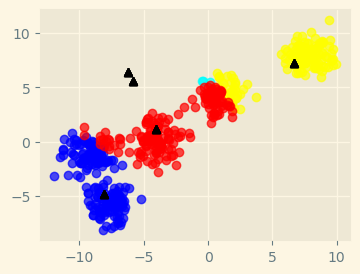

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5558.76it/s]


iteration  =  2


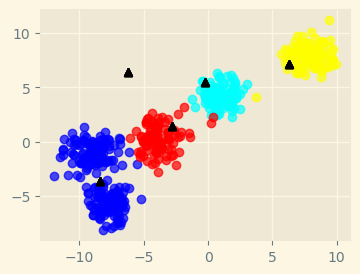

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4312.86it/s]


iteration  =  3


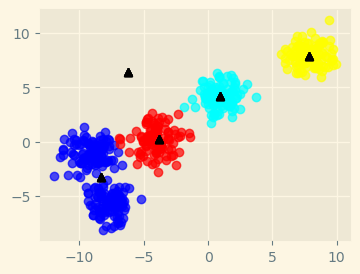

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5266.34it/s]


iteration  =  4


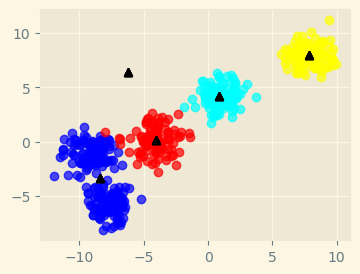

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5379.59it/s]


iteration  =  5


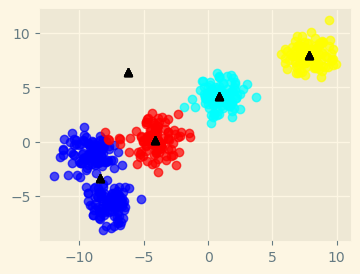

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4276.10it/s]


iteration  =  6


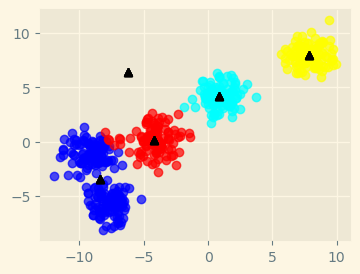

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5817.05it/s]


iteration  =  7


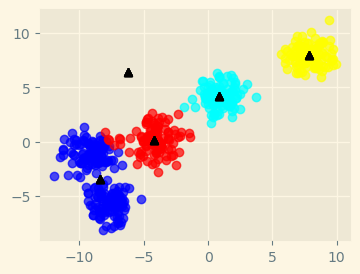

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.11it/s]


iteration  =  8


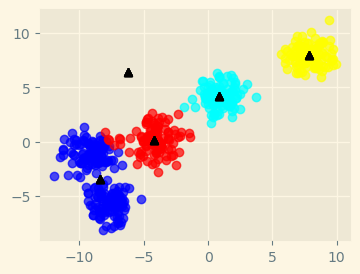

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5885.78it/s]


iteration  =  9


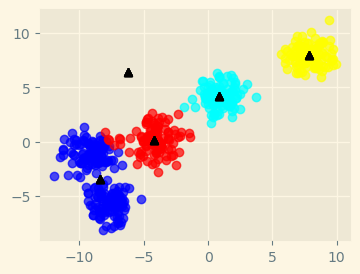

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4507.09it/s]


iteration  =  10


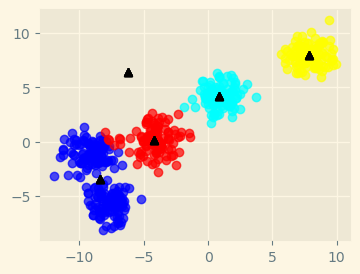

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5885.72it/s]


iteration  =  11


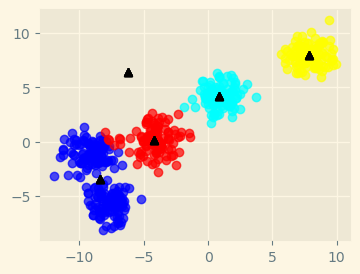

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4764.66it/s]


iteration  =  12


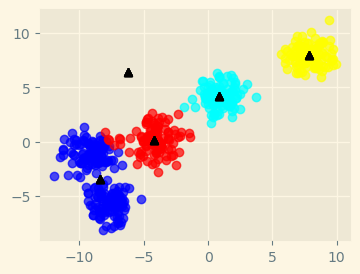

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2810.59it/s]


iteration  =  13


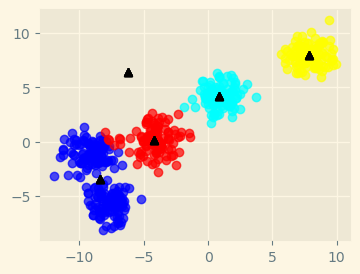

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2748.85it/s]


iteration  =  14


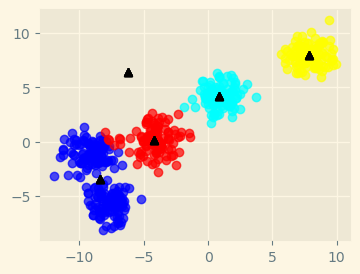

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2995.72it/s]


iteration  =  15


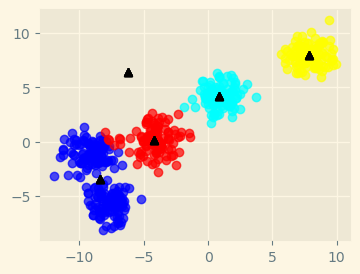

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2718.97it/s]


iteration  =  16


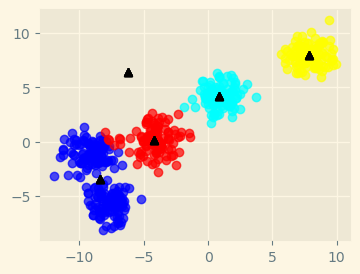

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3186.53it/s]


iteration  =  17


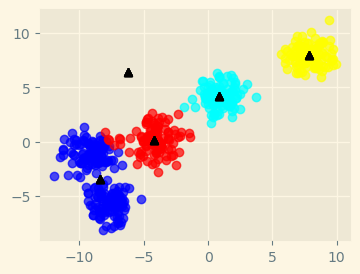

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3548.18it/s]


iteration  =  18


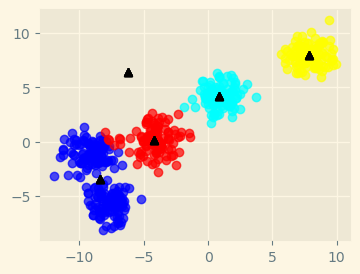

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4589.88it/s]


iteration  =  19


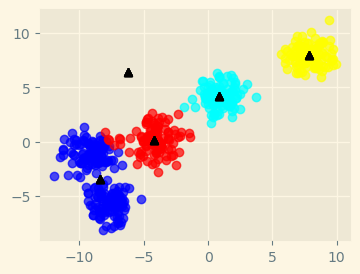

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5379.52it/s]


iteration  =  20


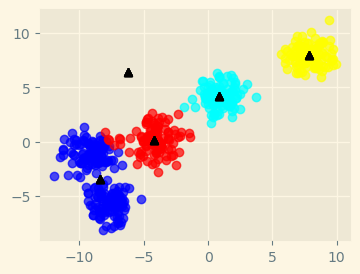

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5955.82it/s]


iteration  =  21


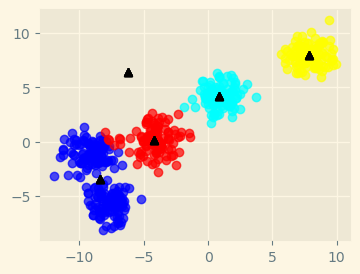

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4589.79it/s]


iteration  =  22


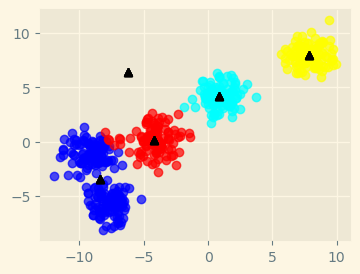

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4350.33it/s]


iteration  =  23


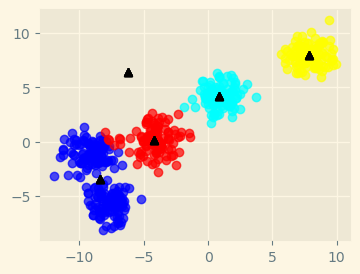

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6176.43it/s]


iteration  =  24


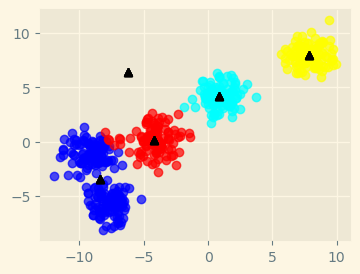

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4857.07it/s]


iteration  =  25


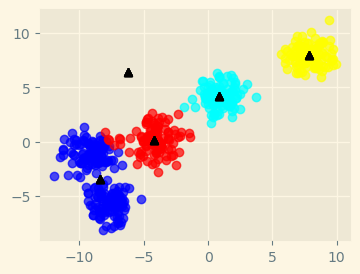

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4719.61it/s]


iteration  =  26


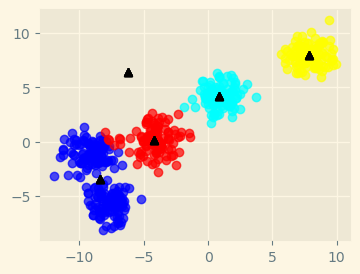

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6760.78it/s]


iteration  =  27


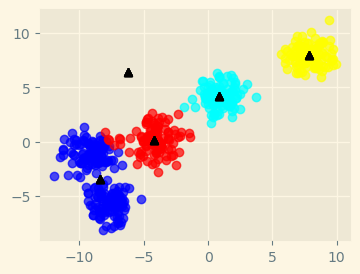

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6760.58it/s]


iteration  =  28


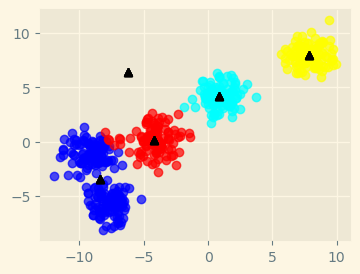

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4589.78it/s]


iteration  =  29


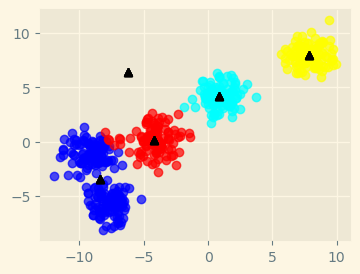

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5002.78it/s]


iteration  =  30


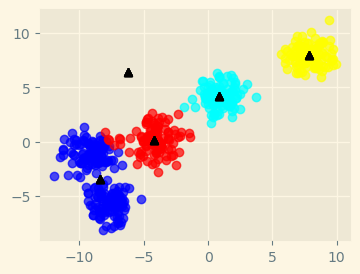

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3498.44it/s]


iteration  =  31


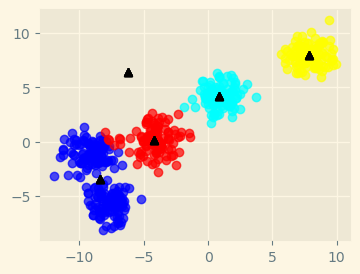

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3269.82it/s]


iteration  =  32


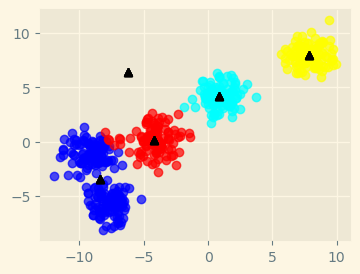

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3380.32it/s]


iteration  =  33


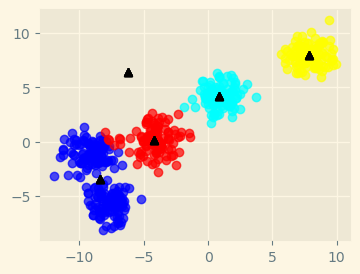

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3107.43it/s]


iteration  =  34


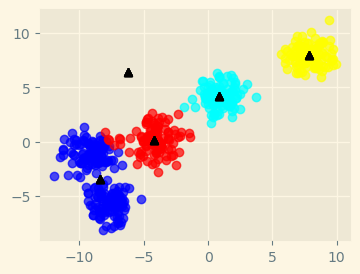

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2733.80it/s]


iteration  =  35


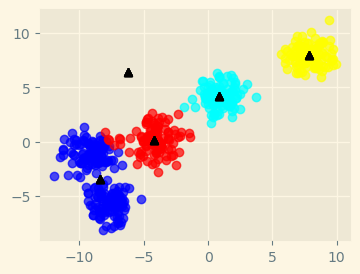

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6332.78it/s]


iteration  =  36


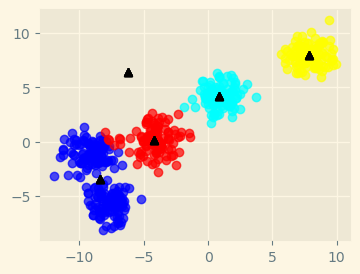

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3186.53it/s]


iteration  =  37


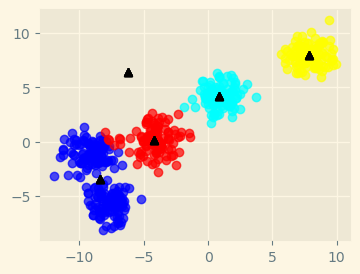

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5684.83it/s]


iteration  =  38


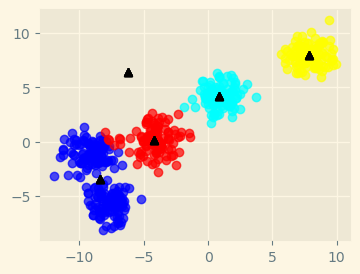

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5211.30it/s]


iteration  =  39


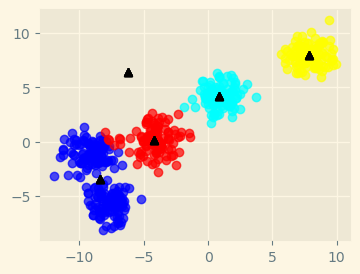

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4719.71it/s]


iteration  =  40


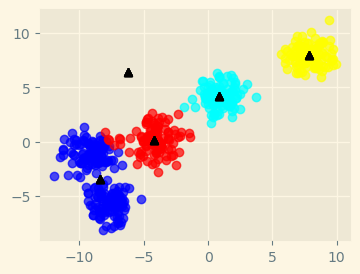

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5104.94it/s]


iteration  =  41


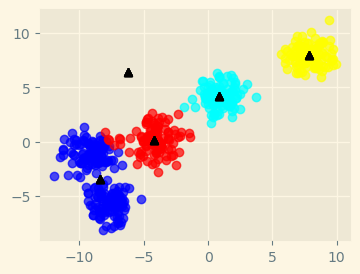

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5497.58it/s]


iteration  =  42


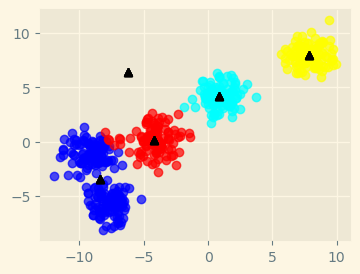

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4632.31it/s]


iteration  =  43


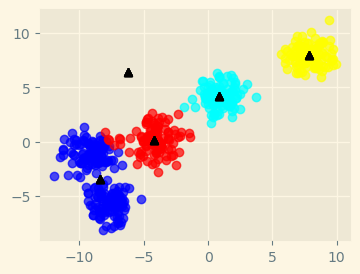

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6253.57it/s]


iteration  =  44


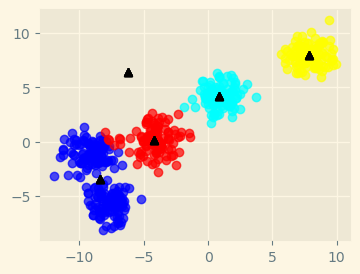

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.30it/s]


iteration  =  45


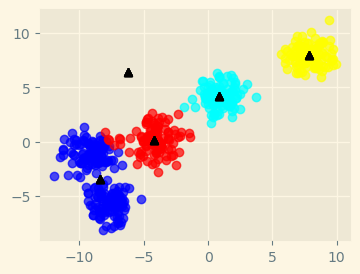

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6582.81it/s]


iteration  =  46


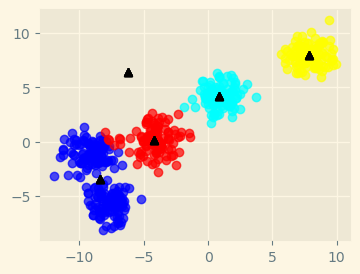

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6101.21it/s]


iteration  =  47


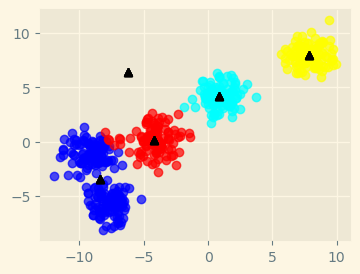

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6670.56it/s]


iteration  =  48


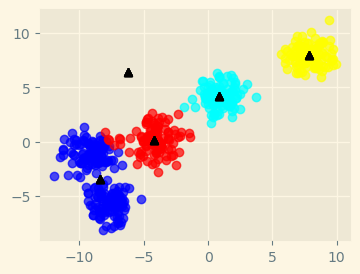

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6414.01it/s]


iteration  =  49


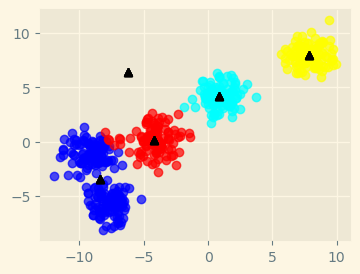

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4100.73it/s]


iteration  =  50


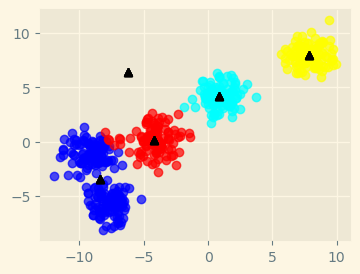

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.32it/s]


iteration  =  51


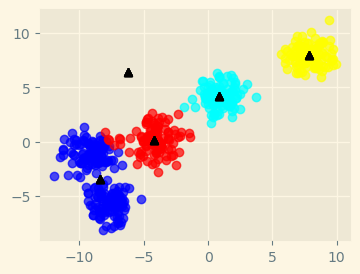

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.26it/s]


iteration  =  52


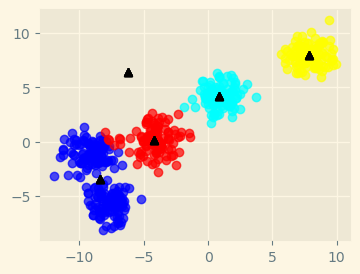

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5105.01it/s]


iteration  =  53


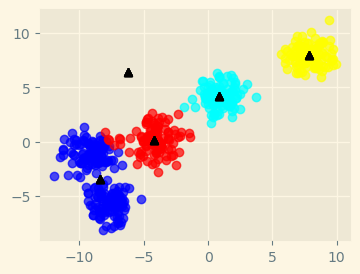

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4632.30it/s]


iteration  =  54


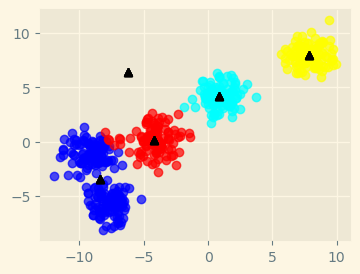

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5438.12it/s]


iteration  =  55


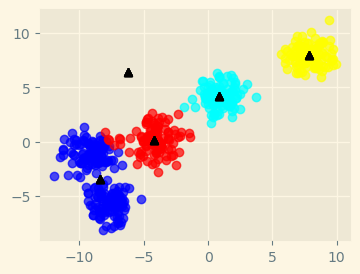

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5885.70it/s]


iteration  =  56


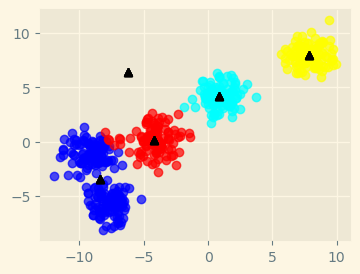

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4427.30it/s]


iteration  =  57


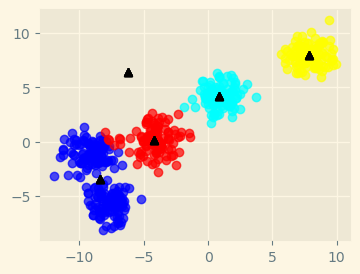

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4169.06it/s]


iteration  =  58


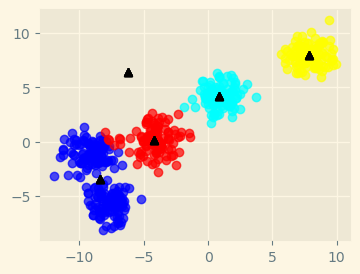

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3939.28it/s]


iteration  =  59


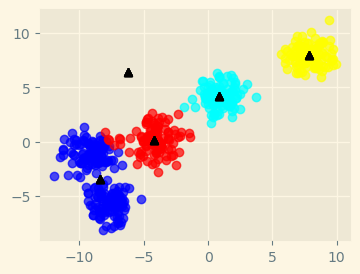

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4275.93it/s]


iteration  =  60


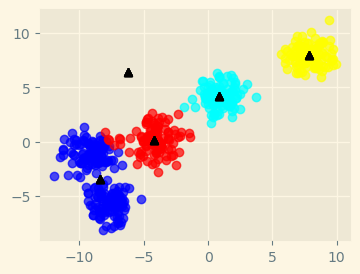

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3599.19it/s]


iteration  =  61


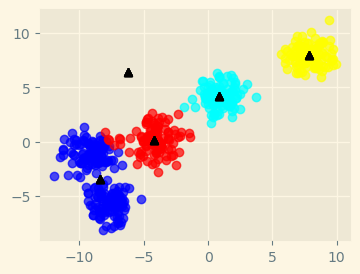

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5885.67it/s]


iteration  =  62


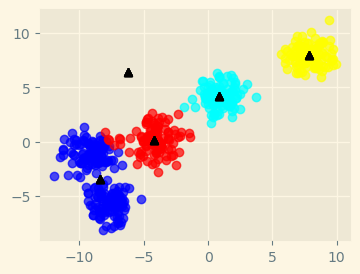

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.10it/s]


iteration  =  63


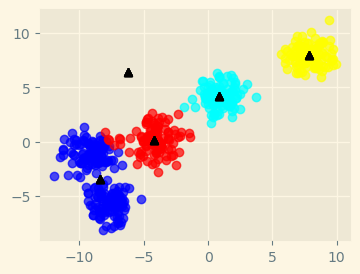

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5104.87it/s]


iteration  =  64


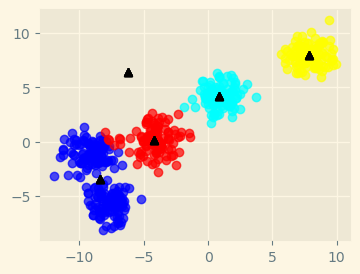

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6414.00it/s]


iteration  =  65


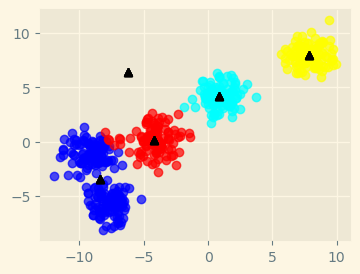

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.23it/s]


iteration  =  66


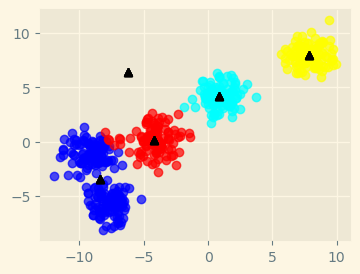

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5379.60it/s]


iteration  =  67


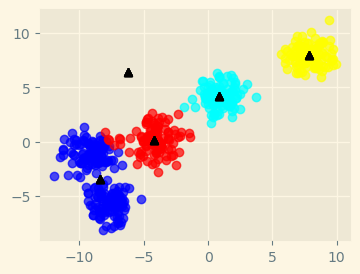

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5379.42it/s]


iteration  =  68


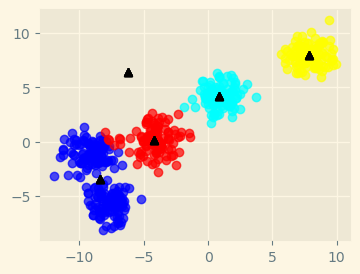

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5211.38it/s]


iteration  =  69


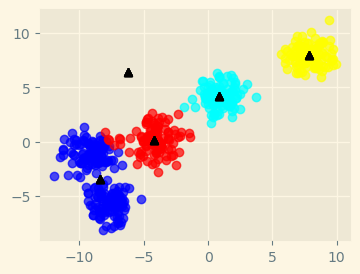

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6176.43it/s]


iteration  =  70


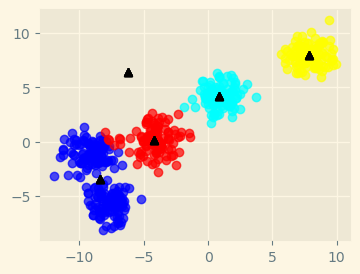

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5558.82it/s]


iteration  =  71


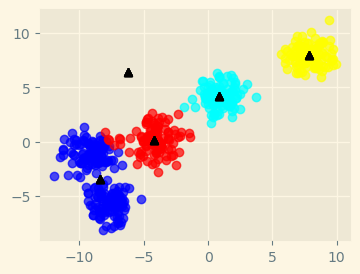

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5437.90it/s]


iteration  =  72


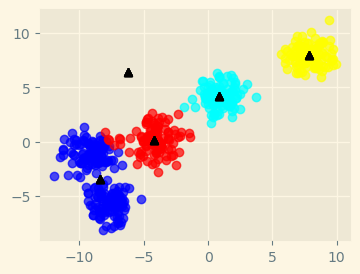

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5750.49it/s]


iteration  =  73


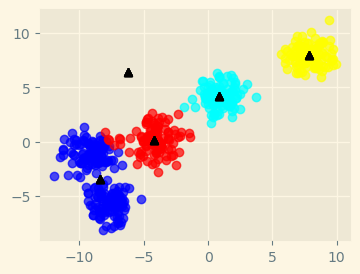

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5437.91it/s]


iteration  =  74


KeyboardInterrupt: 

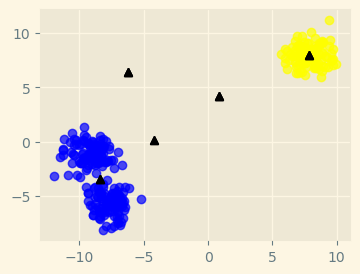

In [244]:
for i in range(100):
    assign_cluster()
    print('iteration  = ',i)
    plot_cluster()
    update_cluster()

Conclusion : Due to random initialiazation of the centers some centers might be assign 0 pts due to its distance 